In [1]:
import pandas as pd
import numpy as np
import glob
import os

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [286]:
df = pd.read_csv("data/innovaid_hackathon_anima/input/0aa0abPoXao4AYllJqUT.csv")
df = df[["RX", "RY", "SCENE_INDEX"]]
df.head()

RX        RY  SCENE_INDEX
0  0.722431  0.189333          1.0
1  0.720382  0.170944          1.0
2  0.718333  0.152556          1.0
3  0.726667  0.195111          1.0
4  0.735000  0.237667          1.0

In [287]:
def coord_mean(coordinates):
    chunks = np.array_split(coordinates, size)
    return [np.mean(chunk) for chunk in chunks]

def coord_std(coordinates):
    chunks = np.array_split(coordinates, size)
    return [np.std(chunk) for chunk in chunks]

In [288]:
size = 3

df = df.groupby(["SCENE_INDEX"]).aggregate({"RX": [coord_mean, coord_std],
                                            "RY": [coord_mean, coord_std]}).reset_index()
df.columns = [f"{col[0]}_{col[1]}" if col[1] else col[0] for col in df.columns]
df.head()

SCENE_INDEX                                      RX_coord_mean  \
0          1.0  [0.3831161492374728, 0.5782952069716775, 0.293...   
1          3.0  [0.5449180555555555, 0.3450249999999999, 0.399...   
2          5.0  [0.5027171840958606, 0.6949993191721134, 0.216...   
3          7.0  [0.42790464743589735, 0.6244580610021787, 0.37...   
4          9.0  [0.50516359508547, 0.29256127450980385, 0.6697...   

                                        RX_coord_std  \
0  [0.231742069333647, 0.17752823363344875, 0.083...   
1  [0.06477554423083788, 0.18593439410726847, 0.2...   
2  [0.14424024122914558, 0.05509810451549506, 0.1...   
3  [0.18550992803407576, 0.04366127980260915, 0.1...   
4  [0.09103099433547374, 0.14259226371502595, 0.0...   

                                       RY_coord_mean  \
0  [0.6421448801742919, 0.48705991285403055, 0.55...   
1  [0.5479466666666666, 0.6368766666666666, 0.653...   
2  [0.18157734204793027, 0.4367298474945534, 0.54...   
3  [0.26517307692307696, 0.5659618736383443, 0.63...   
4  [0.5497179487179487, 0.5740642701525055, 0.494...   

                                        RY_coord_std  
0  [0.17325026013249076, 0.09202646812482047, 0.0...  
1  [0.03515053159775736, 0.045806988105083477, 0....  
2  [0.2612471490240733, 0.04544137747880368, 0.06...  
3  [0.35592856046345944, 0.03812493078547487, 0.0...  
4  [0.08184984097704151, 0.07532192779752094, 0.0...

In [289]:
df = df.apply(lambda col: col.explode(), axis=0).reset_index(drop=True)
df

SCENE_INDEX RX_coord_mean RX_coord_std RY_coord_mean RY_coord_std
0            1.0      0.383116     0.231742      0.642145      0.17325
1            1.0      0.578295     0.177528       0.48706     0.092026
2            1.0      0.293778     0.083271       0.55852     0.058772
3            3.0      0.544918     0.064776      0.547947     0.035151
4            3.0      0.345025     0.185934      0.636877     0.045807
..           ...           ...          ...           ...          ...
145         97.0      0.579729     0.186907      0.475472     0.051116
146         97.0      0.608046     0.034004      0.448942      0.03324
147         99.0      0.530132     0.133821      0.535813      0.22911
148         99.0      0.240055     0.148024      0.508878     0.070544
149         99.0      0.259201     0.025987      0.529378     0.062248

[150 rows x 5 columns]

In [290]:
# size = 30
# os.mkdir(f"data/innovaid_hackathon_anima/input_coords_{size}/")
#
# files = glob.glob("data/innovaid_hackathon_anima/input/*.csv")
# for i, csv in enumerate(files):
#     print(f"{i}/{len(files)}: {csv}")
#
#     df = pd.read_csv(csv)
#     df = df[["RX", "RY", "SCENE_INDEX"]]
#     df = df.groupby(["SCENE_INDEX"]).aggregate({"RX": [coord_mean, coord_std],
#                                                 "RY": [coord_mean, coord_std]}).reset_index()
#     df.columns = [f"{col[0]}_{col[1]}" if col[1] else col[0] for col in df.columns]
#     df = df.apply(lambda col: col.explode(), axis=0).reset_index(drop=True)
#
#     df.to_csv(csv.replace("/input/", f"/input_coords_{size}/"), index=False)

In [291]:
def image_pos_to_binary(image_pos):
    if image_pos == "left":
        return 0
    elif image_pos == "right":
        return 1
    else:
        return 2

In [292]:
df = pd.read_csv("data/innovaid_hackathon_anima/input/0aa0abPoXao4AYllJqUT.csv")
df = df[["IMAGE_POSITION", "SCENE_INDEX"]]

df["IMAGE_POSITION"] = df["IMAGE_POSITION"].apply(image_pos_to_binary)

df.head()

IMAGE_POSITION  SCENE_INDEX
0               1          1.0
1               2          1.0
2               2          1.0
3               1          1.0
4               1          1.0

In [293]:
def agg_pos(image_positions):
    chunks = np.array_split(image_positions, size)
    return [np.argmax(np.bincount(chunk)) if len(chunk) >= 1 else 2 for chunk in chunks]

In [294]:
size = 3

df = df.groupby(["SCENE_INDEX"]).aggregate({"IMAGE_POSITION": agg_pos}).reset_index()
df.head()

SCENE_INDEX IMAGE_POSITION
0          1.0      [0, 1, 0]
1          3.0      [2, 0, 1]
2          5.0      [2, 1, 0]
3          7.0      [2, 1, 0]
4          9.0      [2, 0, 1]

In [295]:
df = df.apply(lambda col: col.explode(), axis=0).reset_index(drop=True)
df

SCENE_INDEX IMAGE_POSITION
0            1.0              0
1            1.0              1
2            1.0              0
3            3.0              2
4            3.0              0
..           ...            ...
145         97.0              1
146         97.0              1
147         99.0              1
148         99.0              0
149         99.0              0

[150 rows x 2 columns]

In [296]:
size = 30
os.mkdir(f"data/innovaid_hackathon_anima/input_positions_{size}/")

files = glob.glob("data/innovaid_hackathon_anima/input/*.csv")
for i, csv in enumerate(files):
    print(f"{i}/{len(files)}: {csv}")

    df = pd.read_csv(csv)
    df = df[["IMAGE_POSITION", "SCENE_INDEX"]]
    df["IMAGE_POSITION"] = df["IMAGE_POSITION"].apply(image_pos_to_binary)

    df = df.groupby(["SCENE_INDEX"]).aggregate({"IMAGE_POSITION": agg_pos}).reset_index()

    df = df.apply(lambda col: col.explode(), axis=0).reset_index(drop=True)

    df.to_csv(csv.replace("/input/", f"/input_positions_{size}/"), index=False)

0/3102: data/innovaid_hackathon_anima/input/NIWf76Hey8eftwtH7Mhn.csv
1/3102: data/innovaid_hackathon_anima/input/5wkYPhQUJDJ5wj1V2Nk4.csv
2/3102: data/innovaid_hackathon_anima/input/krJ3q9NcKQ2elEdfUc2b.csv
3/3102: data/innovaid_hackathon_anima/input/ykb8Kau47lOpf94ogXqW.csv
4/3102: data/innovaid_hackathon_anima/input/9kaeHX0tKCwDx3YTqtKa.csv
5/3102: data/innovaid_hackathon_anima/input/UEGF9hSh8QZt8KSYiXWp.csv
6/3102: data/innovaid_hackathon_anima/input/6xXlQ54eY3eQmQK85PWZ.csv
7/3102: data/innovaid_hackathon_anima/input/x4kas0wczT56dyOOT6Qm.csv
8/3102: data/innovaid_hackathon_anima/input/rrU7PfbZjJ1PYPQfpsBC.csv
9/3102: data/innovaid_hackathon_anima/input/8He1aUWtiBw4Ql4pY9AD.csv
10/3102: data/innovaid_hackathon_anima/input/P7tbw1M1GKfYePp4lWeq.csv
11/3102: data/innovaid_hackathon_anima/input/ZfHt08ZCxlw8VKyTDHk2.csv
12/3102: data/innovaid_hackathon_anima/input/mMYeQaHJNjQ1XvvmT7IZ.csv
13/3102: data/innovaid_hackathon_anima/input/sHsuhtf1RpCPKAcc1vTW.csv
14/3102: data/innovaid_hackath

In [297]:
df = pd.read_csv("data/innovaid_hackathon_anima/input/0aa0abPoXao4AYllJqUT.csv")
df = df[["IMAGE_POSITION", "SCENE_INDEX"]]

df["IMAGE_POSITION"] = df["IMAGE_POSITION"].apply(image_pos_to_binary)

df.head()

IMAGE_POSITION  SCENE_INDEX
0               1          1.0
1               2          1.0
2               2          1.0
3               1          1.0
4               1          1.0

In [301]:
def agg_pos_max(image_positions):
    return np.argmax(np.bincount(image_positions))

In [302]:
df = df.groupby(["SCENE_INDEX"]).aggregate({"IMAGE_POSITION": agg_pos_max}).reset_index()
df.head()

SCENE_INDEX  IMAGE_POSITION
0          1.0               0
1          3.0               2
2          5.0               0
3          7.0               1
4          9.0               1

In [303]:
os.mkdir("data/innovaid_hackathon_anima/input_max_positions/")

files = glob.glob("data/innovaid_hackathon_anima/input/*.csv")
for i, csv in enumerate(files):
    print(f"{i}/{len(files)}: {csv}")

    df = pd.read_csv(csv)
    df = df[["IMAGE_POSITION", "SCENE_INDEX"]]
    df["IMAGE_POSITION"] = df["IMAGE_POSITION"].apply(image_pos_to_binary)

    df = df.groupby(["SCENE_INDEX"]).aggregate({"IMAGE_POSITION": agg_pos_max}).reset_index()

    df.to_csv(csv.replace("/input/", "/input_max_positions/"), index=False)

0/3102: data/innovaid_hackathon_anima/input/NIWf76Hey8eftwtH7Mhn.csv
1/3102: data/innovaid_hackathon_anima/input/5wkYPhQUJDJ5wj1V2Nk4.csv
2/3102: data/innovaid_hackathon_anima/input/krJ3q9NcKQ2elEdfUc2b.csv
3/3102: data/innovaid_hackathon_anima/input/ykb8Kau47lOpf94ogXqW.csv
4/3102: data/innovaid_hackathon_anima/input/9kaeHX0tKCwDx3YTqtKa.csv
5/3102: data/innovaid_hackathon_anima/input/UEGF9hSh8QZt8KSYiXWp.csv
6/3102: data/innovaid_hackathon_anima/input/6xXlQ54eY3eQmQK85PWZ.csv
7/3102: data/innovaid_hackathon_anima/input/x4kas0wczT56dyOOT6Qm.csv
8/3102: data/innovaid_hackathon_anima/input/rrU7PfbZjJ1PYPQfpsBC.csv
9/3102: data/innovaid_hackathon_anima/input/8He1aUWtiBw4Ql4pY9AD.csv
10/3102: data/innovaid_hackathon_anima/input/P7tbw1M1GKfYePp4lWeq.csv
11/3102: data/innovaid_hackathon_anima/input/ZfHt08ZCxlw8VKyTDHk2.csv
12/3102: data/innovaid_hackathon_anima/input/mMYeQaHJNjQ1XvvmT7IZ.csv
13/3102: data/innovaid_hackathon_anima/input/sHsuhtf1RpCPKAcc1vTW.csv
14/3102: data/innovaid_hackath

In [317]:
def ordered_set(seq):
    seen = set()
    l = []
    for v in seq:
        try:
            v = int(v)
        except:
            continue
        if v not in seen:
            l.append(v)
            seen.add(v)
    return l


In [319]:

files = glob.glob("data/innovaid_hackathon_anima/input/*.csv")
for i, csv in enumerate(files):
    print(f"{i}/{len(files)}: {csv}")

    df = pd.read_csv(csv)
    print(ordered_set(df["IMAGE"]))

    print()

    # break

    # df = df.groupby(["SCENE_INDEX"]).aggregate({"IMAGE_POSITION": agg_pos_max}).reset_index()
    #
    # df.to_csv(csv.replace("/input/", "/input_max_positions/"), index=False)

0/3102: data/innovaid_hackathon_anima/input/NIWf76Hey8eftwtH7Mhn.csv
[12479670, 12479672, 12481764, 12479674, 12479675, 12479677, 22586451, 12479977, 12479678, 12479680, 12479681, 12479683, 22586452, 12479691, 12479693, 22586454, 12479695, 12479696, 12479978, 12479979, 12479980, 12479985, 12479984, 12479988, 12479989, 12479990, 12479991, 12479994, 12479995, 12480000, 12480023, 12480005, 12480007, 12480008, 12480009, 12480022, 12480002, 12480006, 12480027, 12480028, 12480030, 22586455, 12480036, 12480035, 12480039, 12480045, 12480203, 12480185, 12480189, 12480190, 12480193, 12480192, 12480194, 12480195, 12480198, 12480197, 12480218, 12480199, 22586456, 22586457, 12480214, 12480200, 12480777, 22586458, 12480785, 12480215, 12481472, 12481618, 12481475, 12481474, 12481476, 12481473, 12481621, 12481619, 22586461, 22586460, 12480784]

1/3102: data/innovaid_hackathon_anima/input/5wkYPhQUJDJ5wj1V2Nk4.csv
[49478887, 49478888, 49478894, 49478895, 49478901, 49478902, 49478918, 49478921, 49478944,


KeyboardInterrupt



In [2]:
size = 30

In [14]:
import matplotlib.pyplot as plt

plt.style.use('dark_background')
# plt.style.use('seaborn-v0_8')
plt.rcParams["grid.linestyle"] = "--"

# plt.rcParams["figure.figsize"] = (16, 5)

plt.rcParams['legend.frameon'] = True
plt.rcParams['legend.shadow'] = True
plt.rcParams['legend.facecolor'] = "darkslateblue"

left: 1.5408666695030053
right: 0


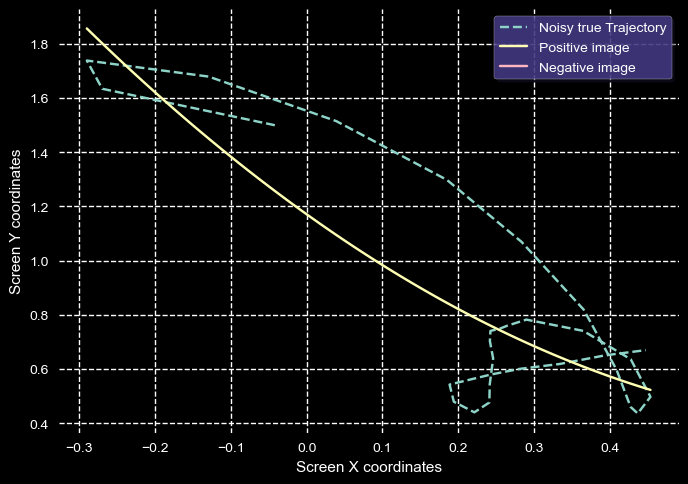

left: 0.31890654743716756
right: 0.07549805729348065


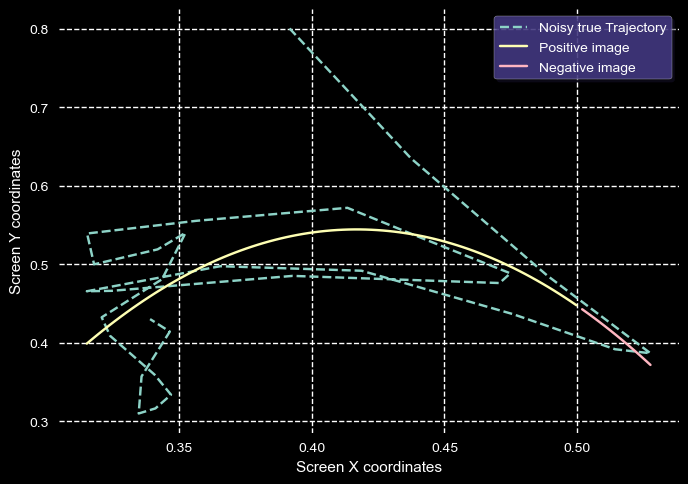

left: 0.06956956362229899
right: 0.19791925930038806


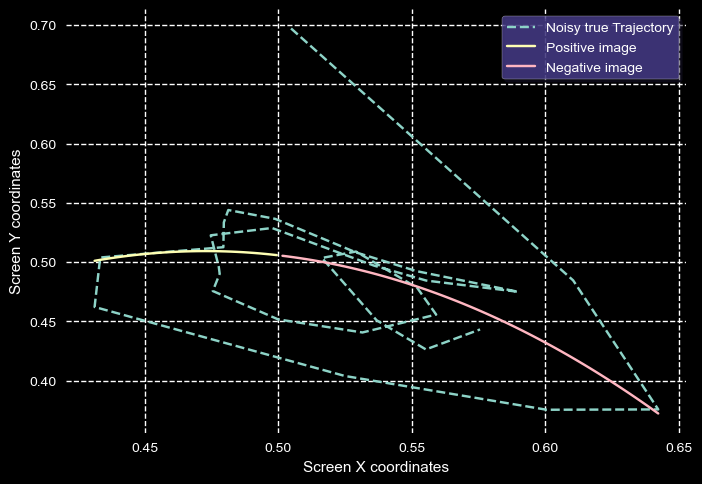

left: 1.9033480202316795
right: 0.23474867902968874


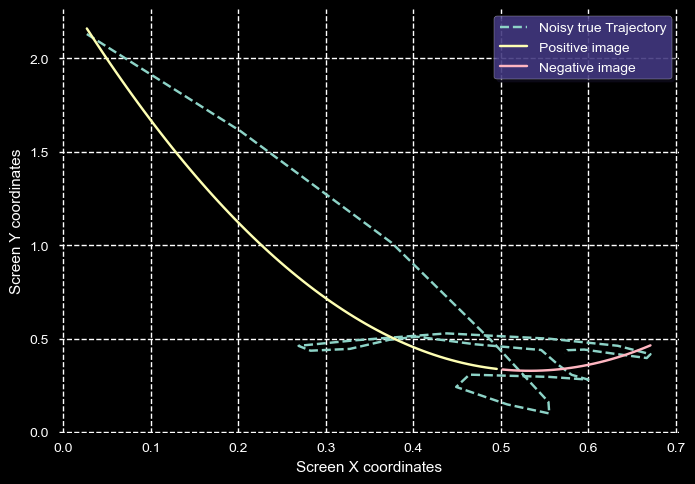

left: 0.4246212728932853
right: 0.21938154494806272


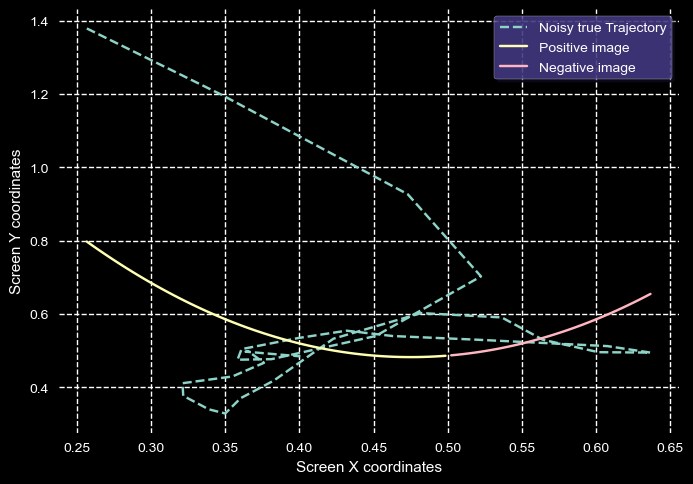

left: 0.2561365284391249
right: 0.19305353640975395


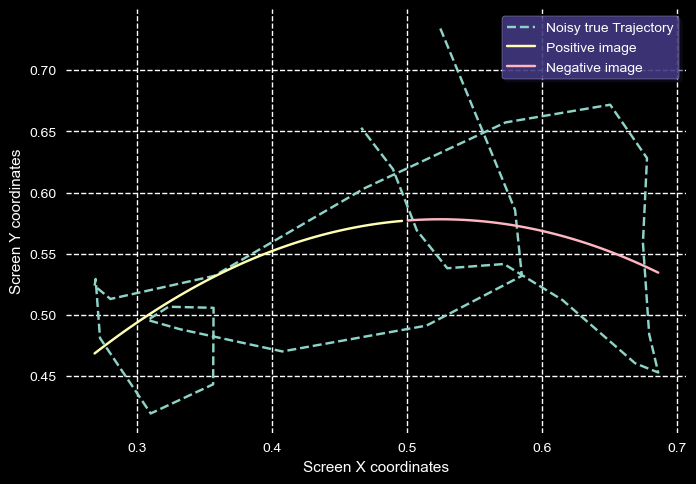

left: 0.6937759856527794
right: 0.21405345991619115


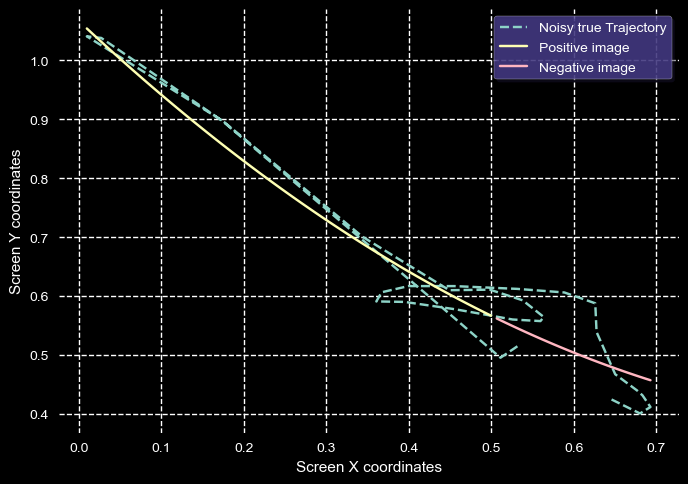

left: 0.1707797601313066
right: 0.17685739905831907


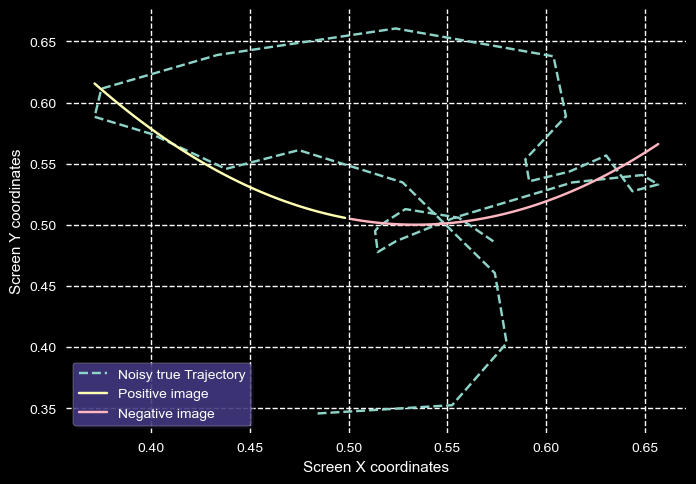

left: 0.1827776596552197
right: 0.2919073594392845


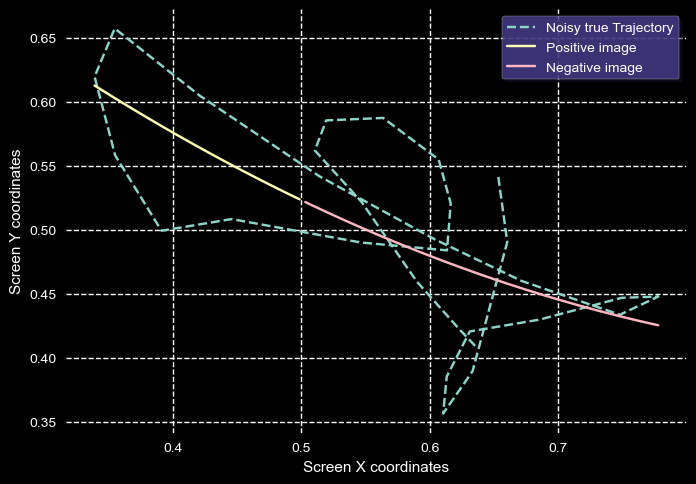

left: 1.020537543610009
right: 0.2264891726510646


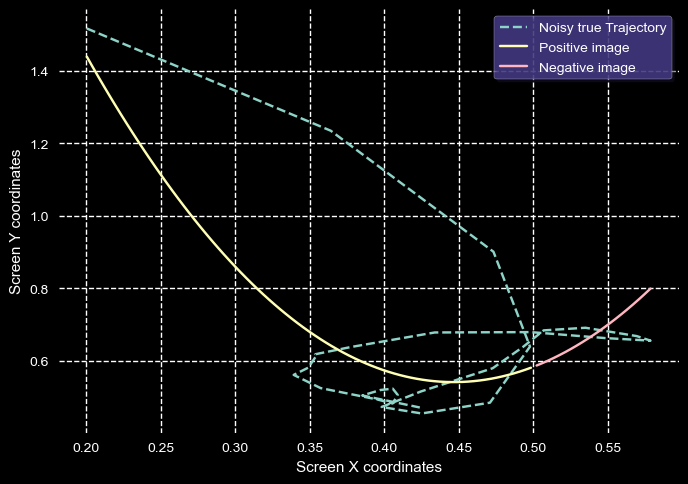

left: 0.8723833603879065
right: 0.22775730095528612


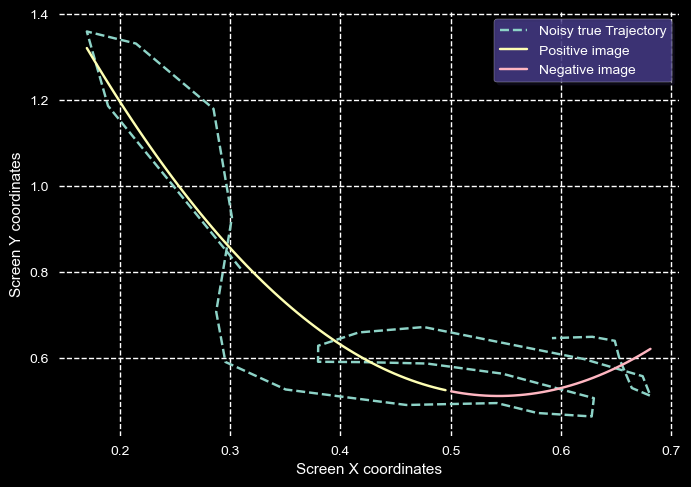

left: 1.5681534477770749
right: 0.19313550883899072


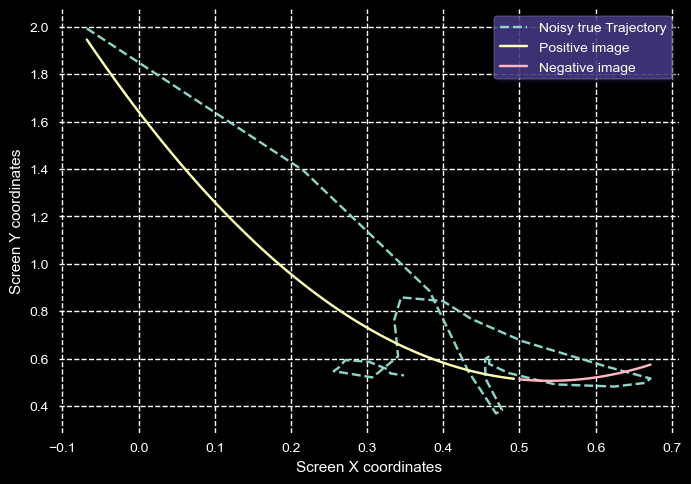

left: 0.2556558263082131
right: 0.19418595608587647


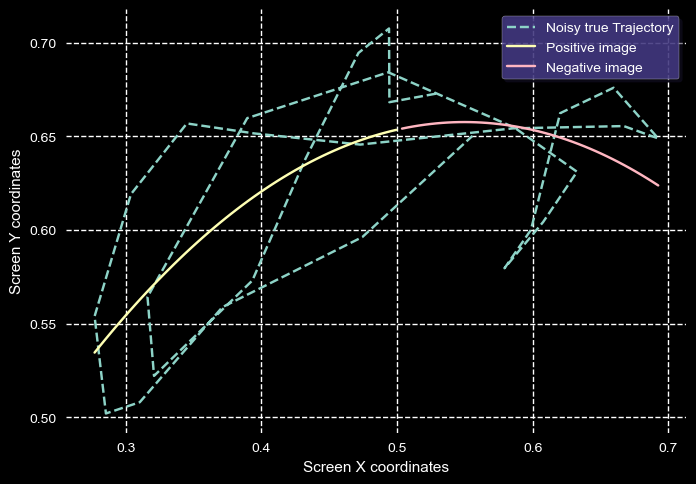

left: 0.42899148515006863
right: 0.30944327576366737


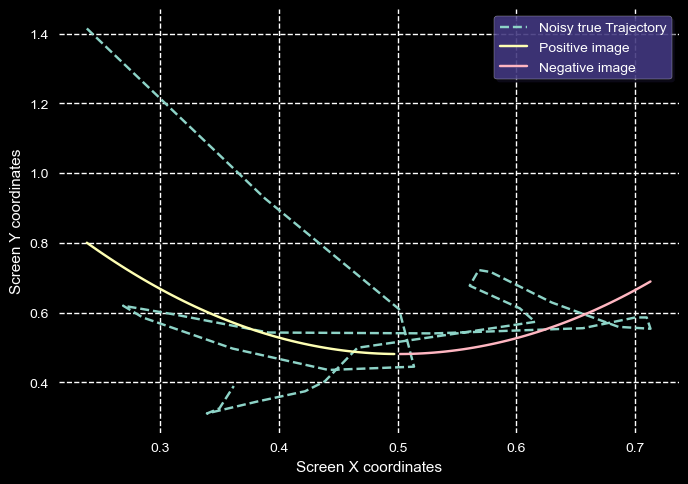

left: 1.417770457888913
right: 0.22742487204759998


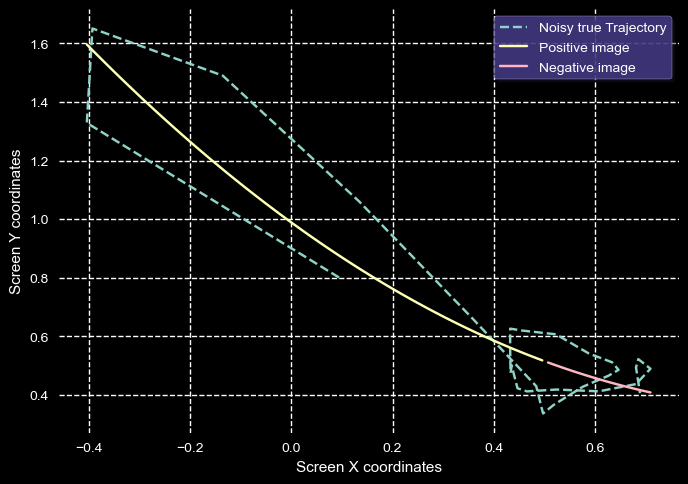

left: 0.6481002985297923
right: 0.16575683968975957


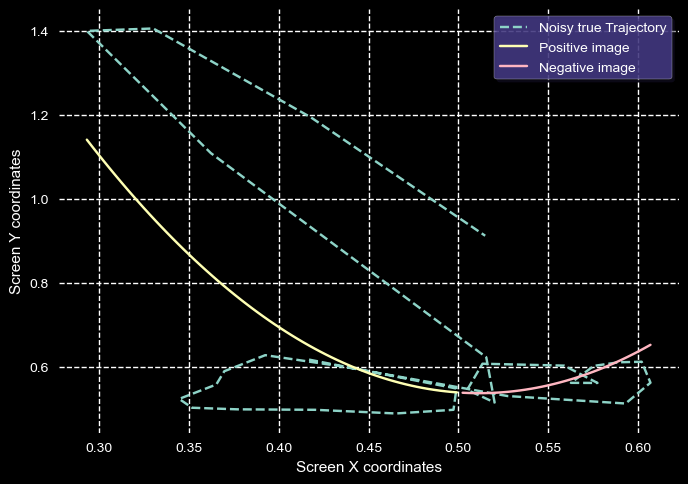

left: 0.17670520690637276
right: 0.469807681973595


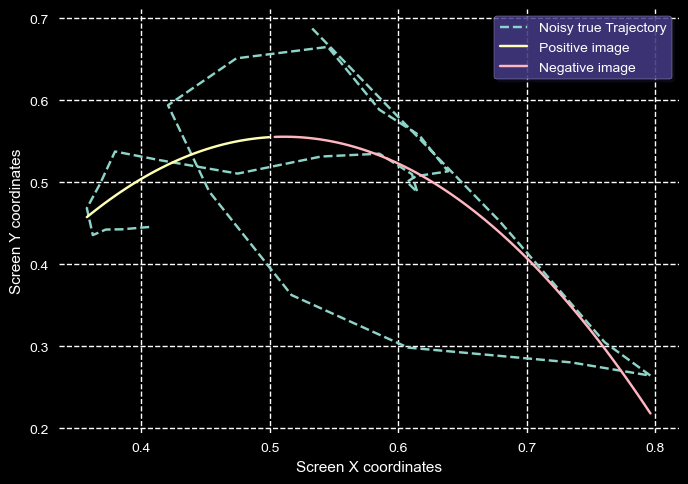

left: 0.44800969735593005
right: 0.1970311586981066


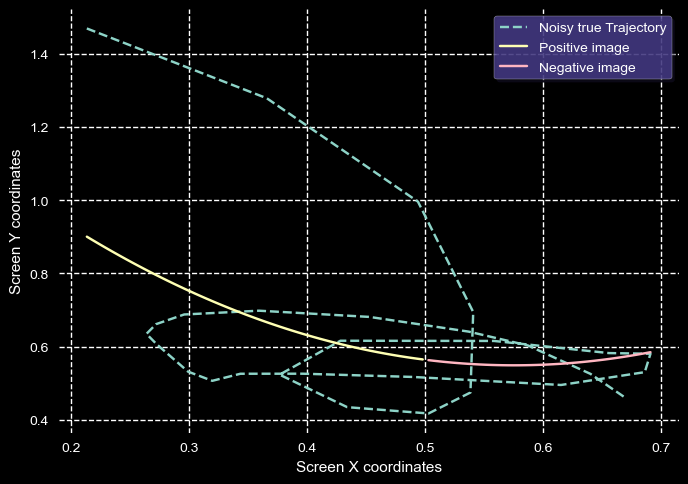

left: 1.8280730183975638
right: 0.26958620467269623


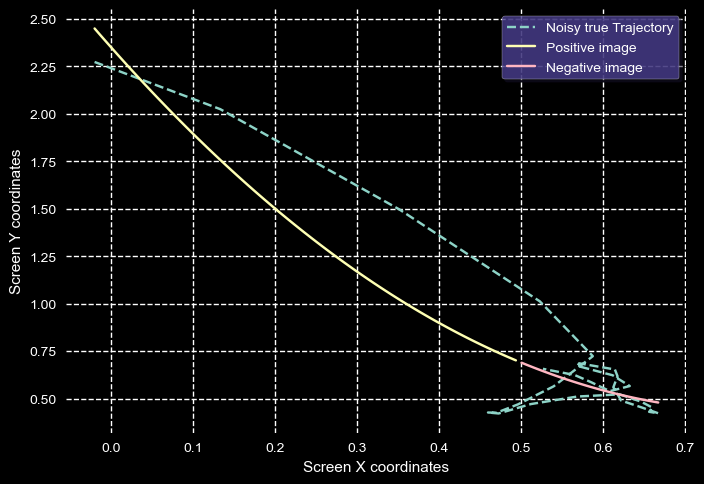

left: 0.1698896676314984
right: 0.15553787668545654


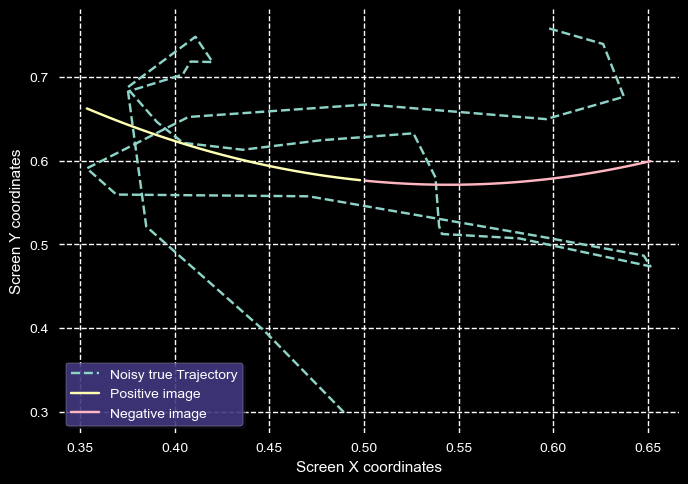

left: 0.3288627150167654
right: 0.0625440022194232


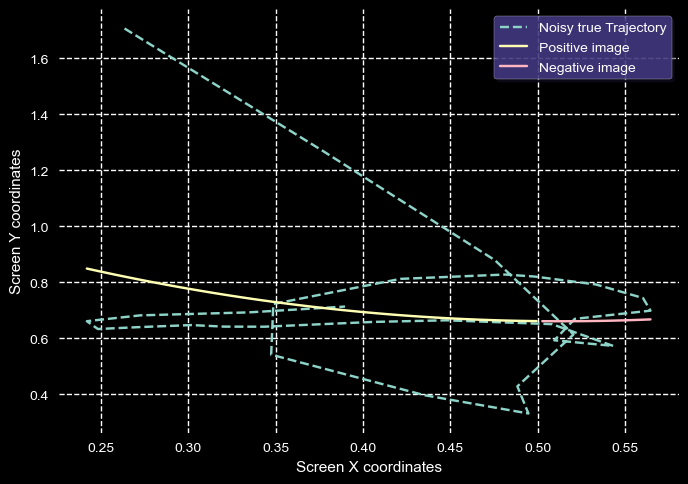

left: 0.20346299917153896
right: 0.17971714023782392


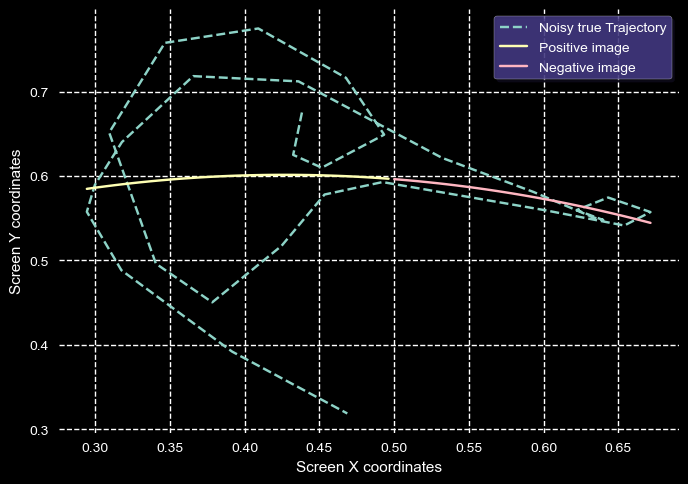

left: 0.19192184416076352
right: 0.21210890187389014


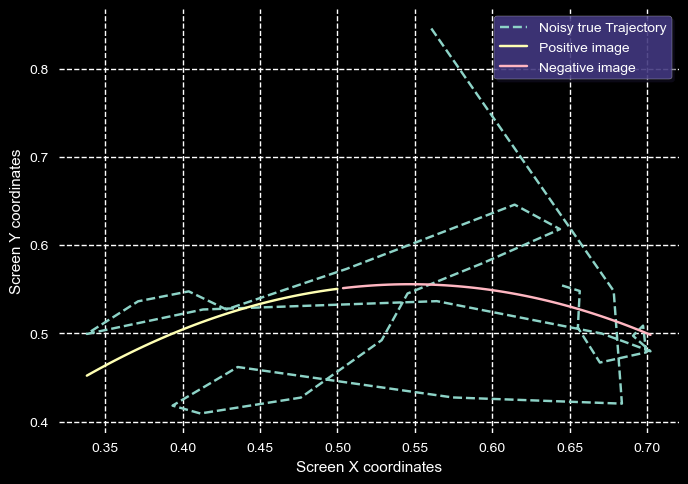

left: 1.260323430368868
right: 0.23022153210634844


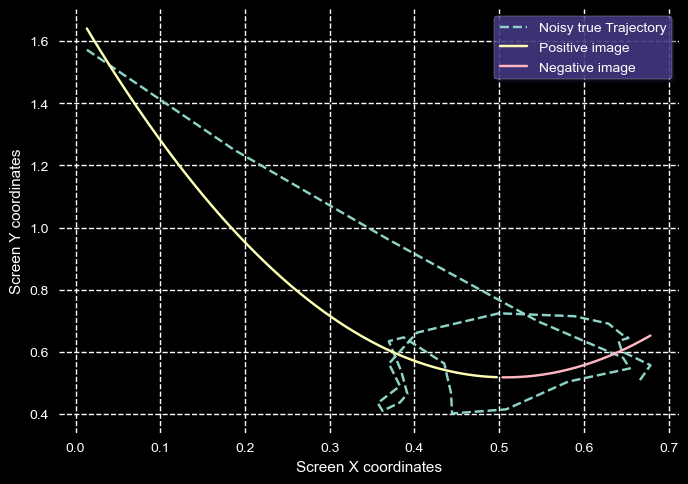

left: 1.429117406248215
right: 0.2932489862584597


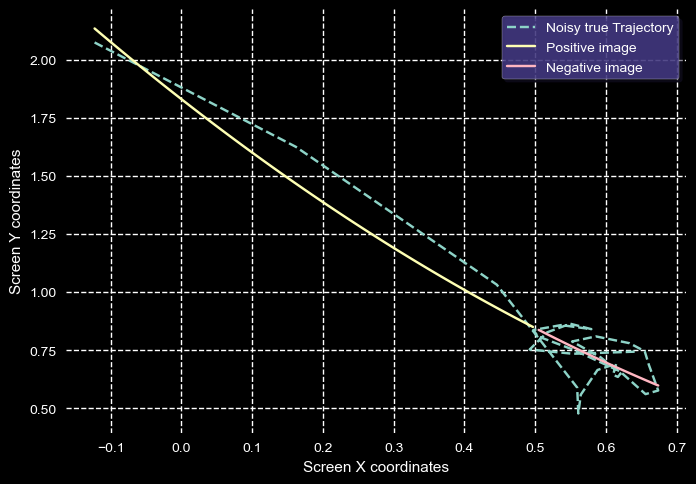

left: 0.185842387702661
right: 0.18879002356525126


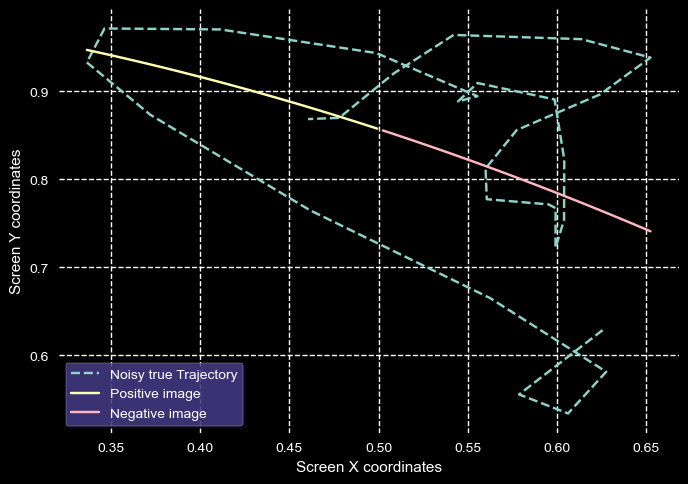

left: 0.17929324043179354
right: 0.27727566130589765


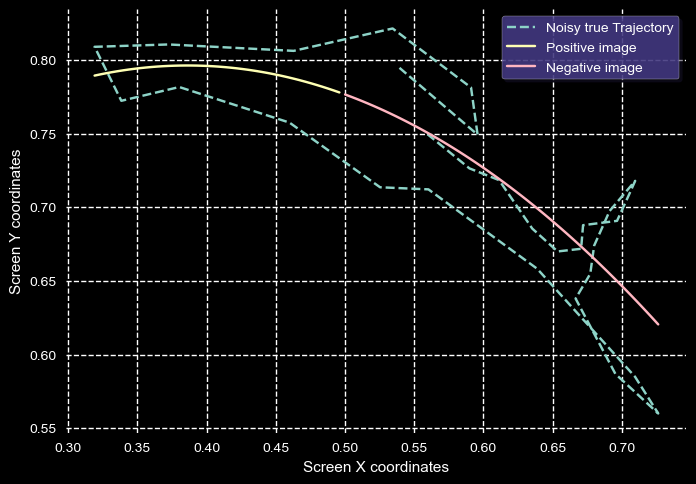

left: 0.7157161766386366
right: 0.3203581329009637


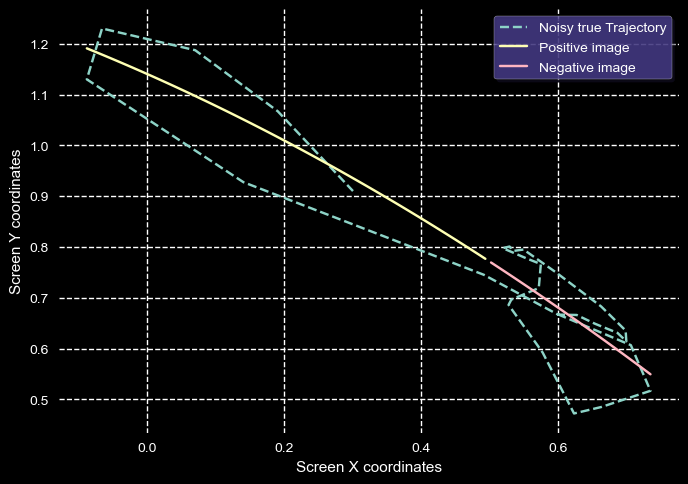

left: 0.145957859400063
right: 0.36448586569374775


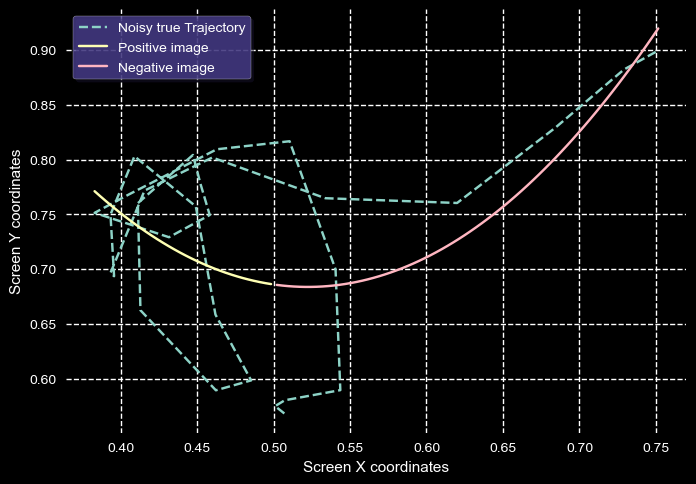

left: 0.1360825701675364
right: 0.4211296613322728


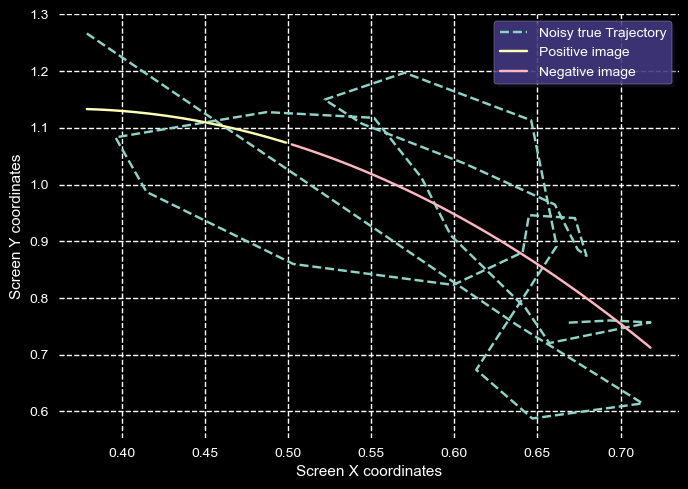

left: 0.12287949938425403
right: 0.23759624265208615


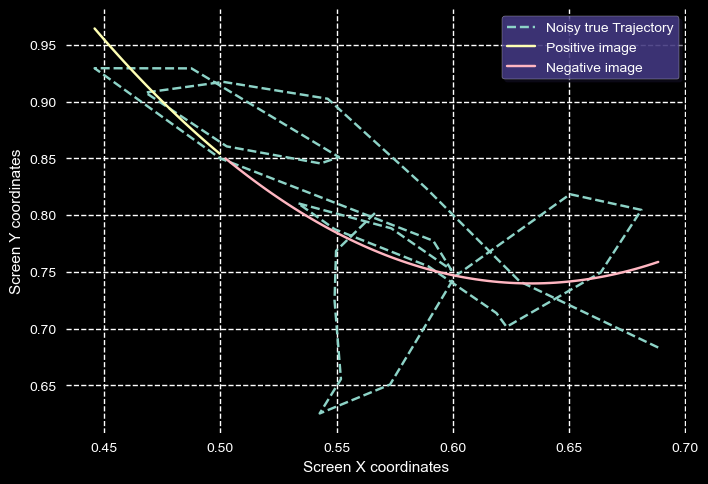

left: 1.3004006545619353
right: 0.3164615626778914


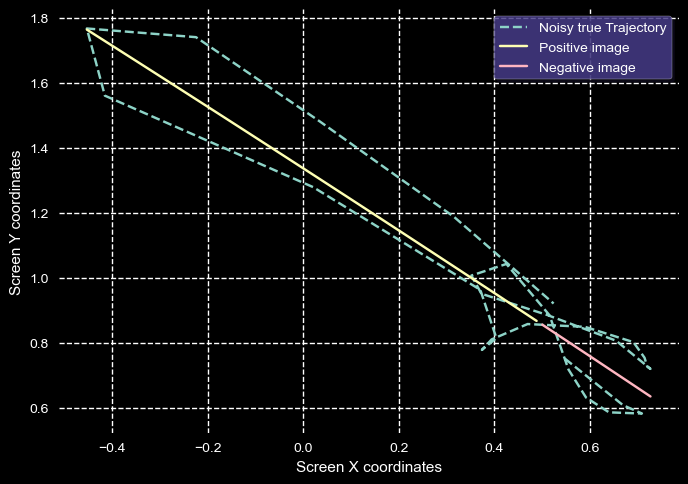

left: 0.22858046273539395
right: 0.2596389115693161


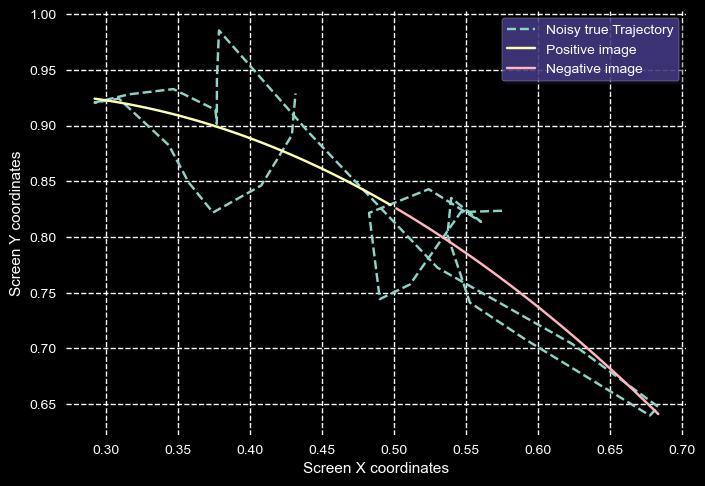

left: 0.2651778440658793
right: 0.2002345484814296


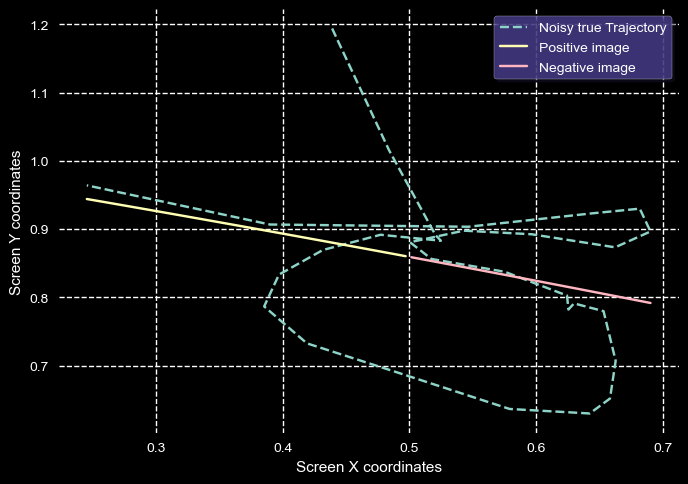

left: 0.5056729968615651
right: 0.430311556356191


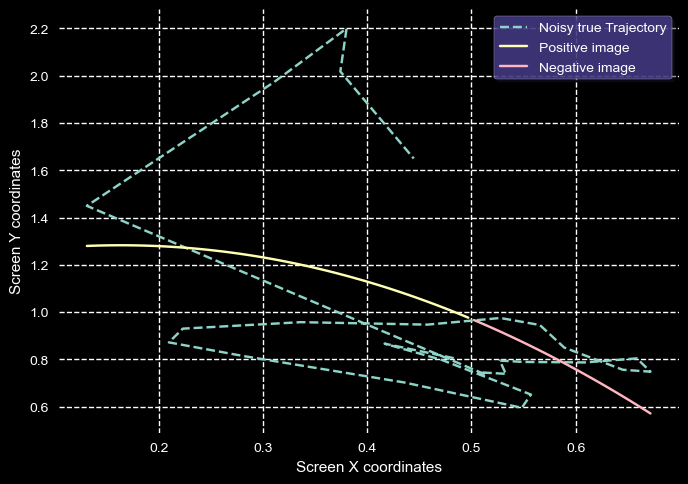

left: 0.3041165052508888
right: 0.5716765779654611


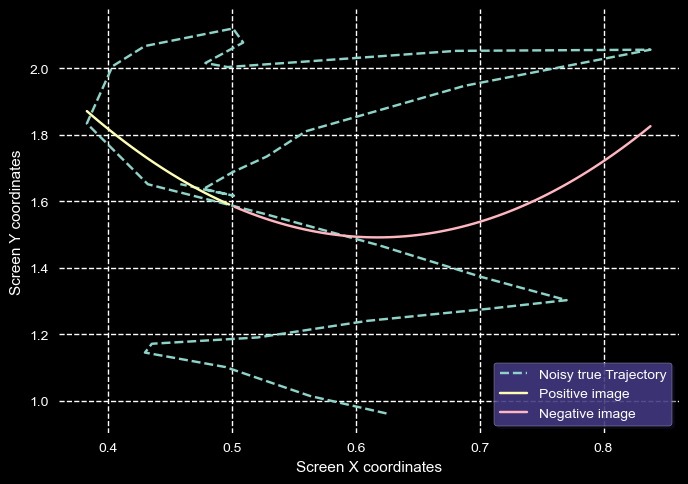

left: 0.21860926406183018
right: 0.46725270576093264


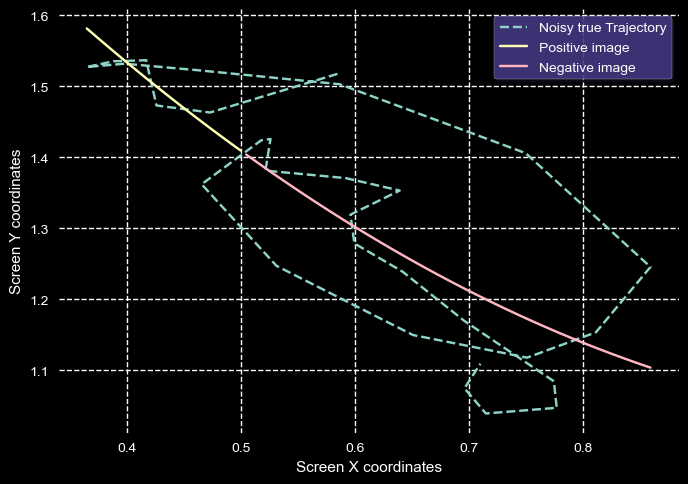

left: 0.38732081638335375
right: 0.40306402938497776


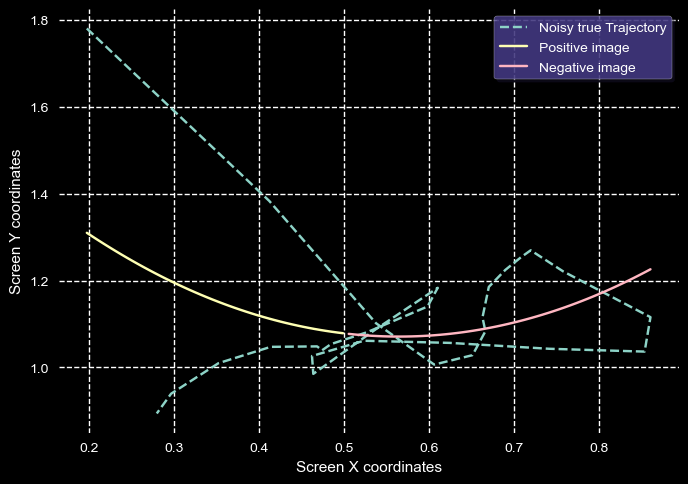

left: 0.12365019518332221
right: 0.26643344856673146


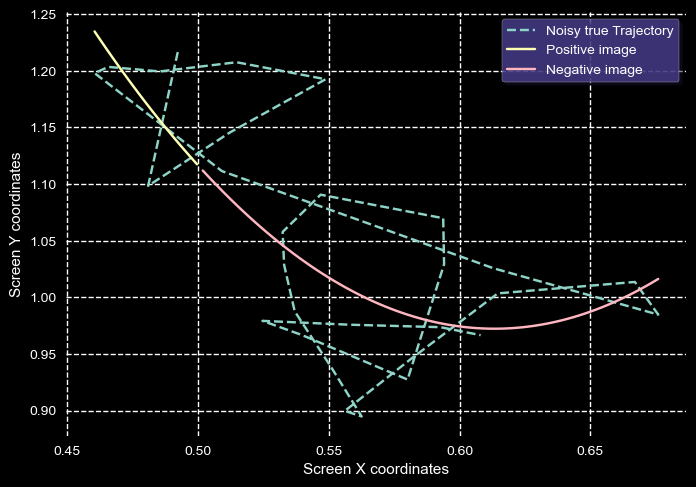

left: 1.4105231497923845
right: 0


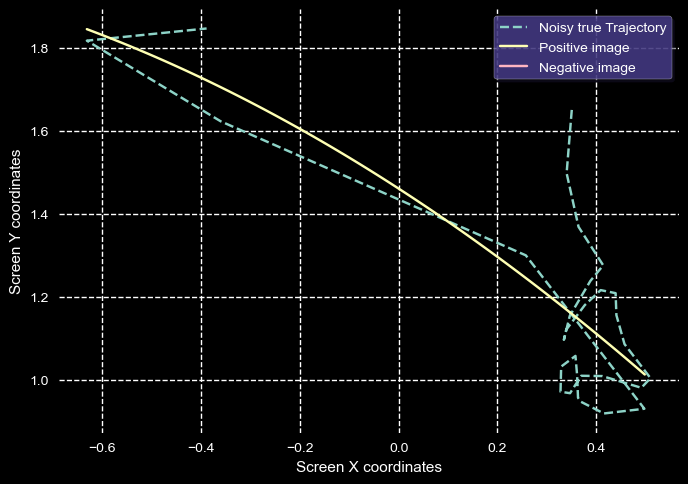

left: 0.5007422536583048
right: 4.809320676795995


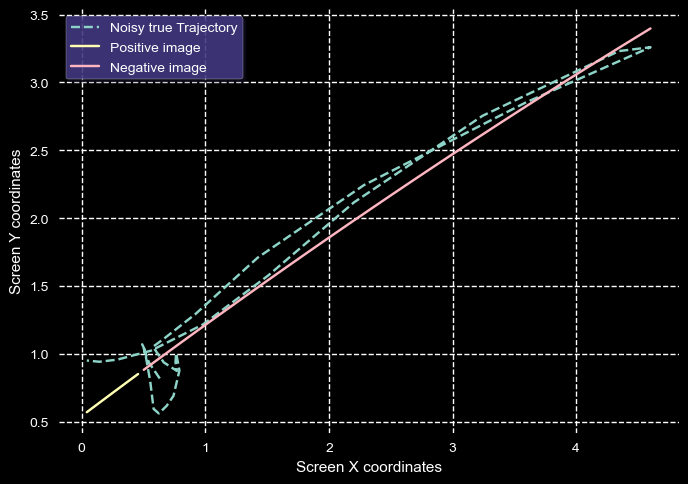

left: 0.2716170621521906
right: 2.922514616153772


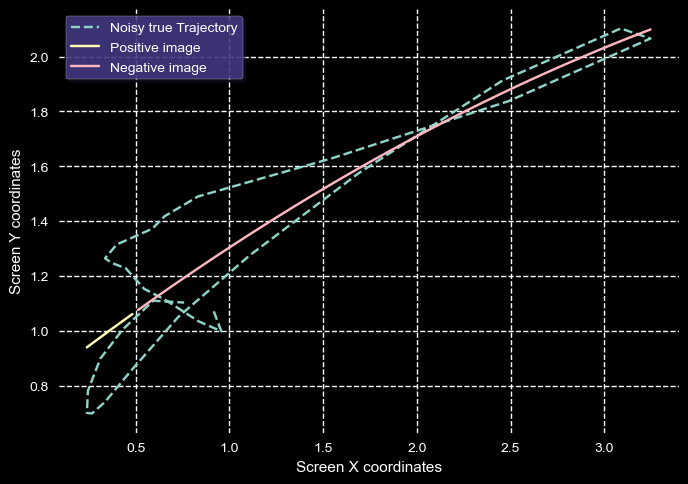

left: 0.3127694115864169
right: 0.2968838558994322


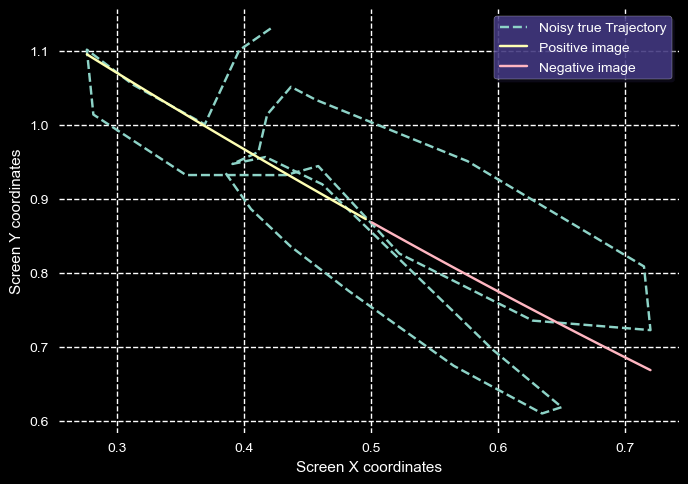

left: 0.5320802244167487
right: 0.6407949933080936


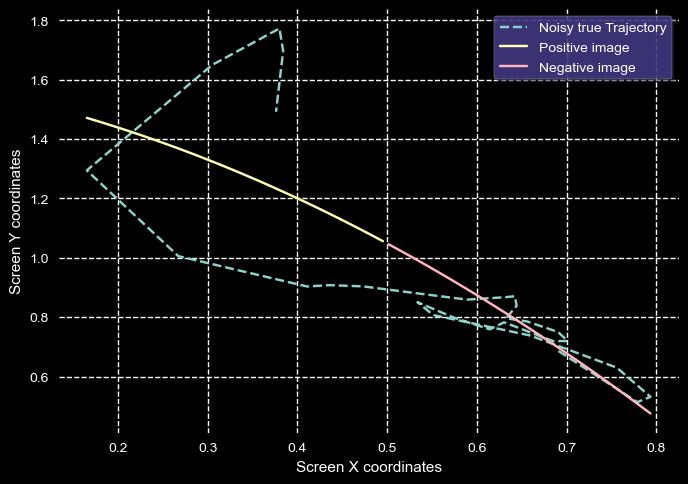

left: 0.27746113863498467
right: 0.3736214953911412


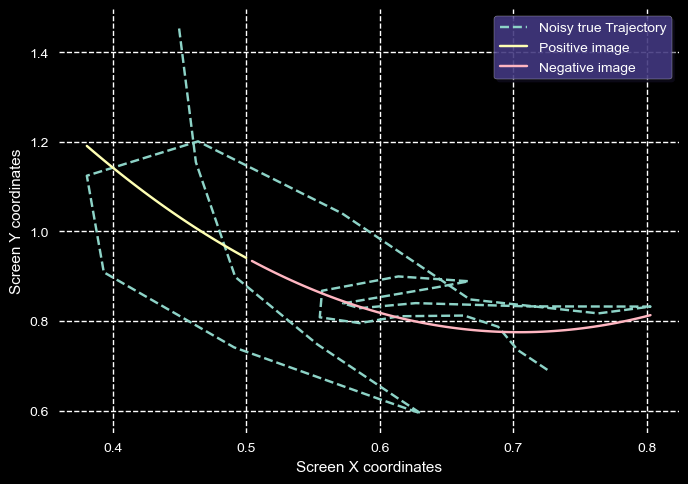

left: 0.502308822216606
right: 0.3477467448282791


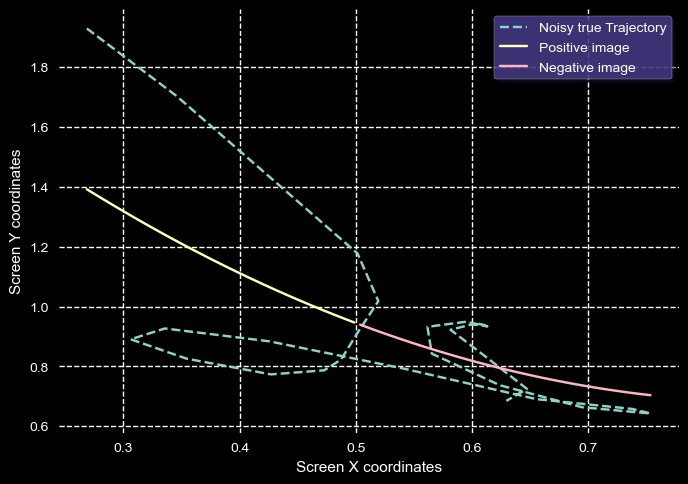

left: 0.13186192818578477
right: 0.20753537814319964


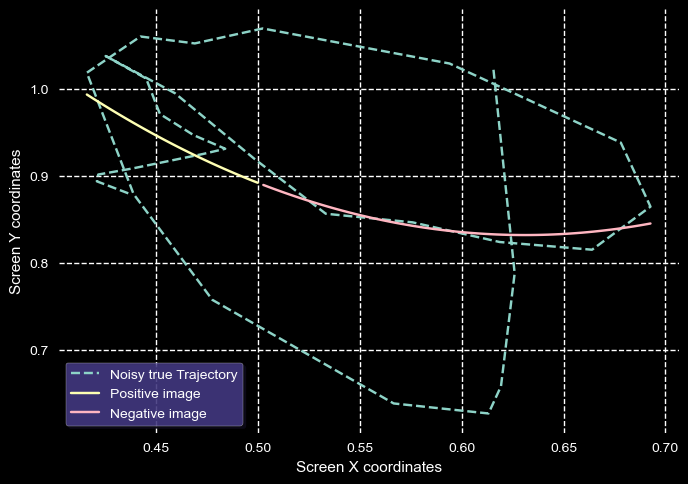

left: 0.18352178402737057
right: 0.206183858223036


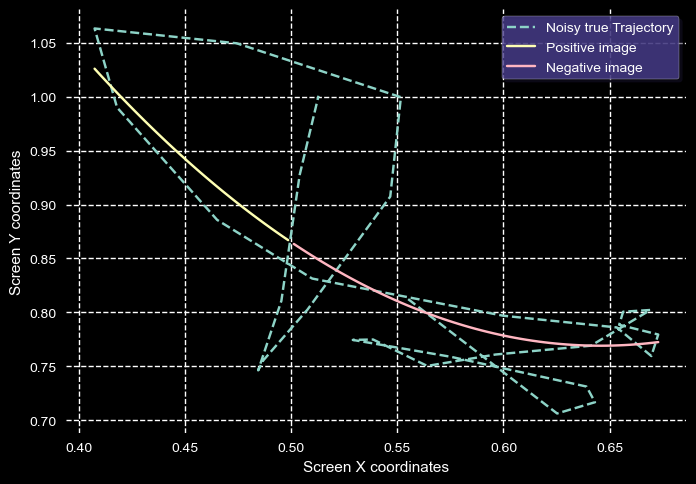

left: 0.7336357450768255
right: 0.321917908443783


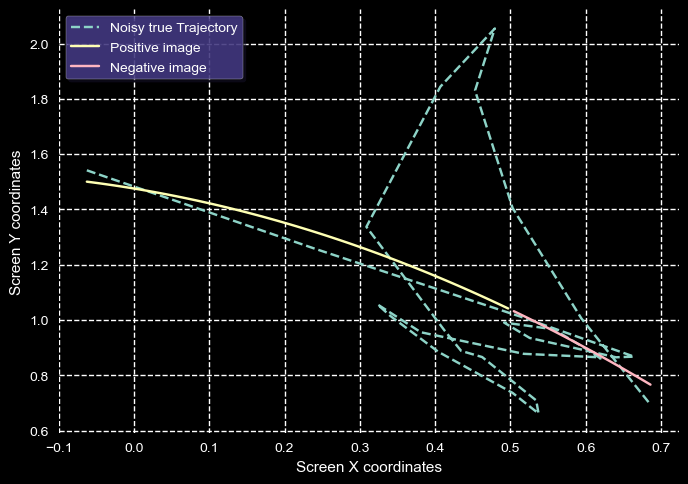

left: 0.3204981496295422
right: 0.1773709892203021


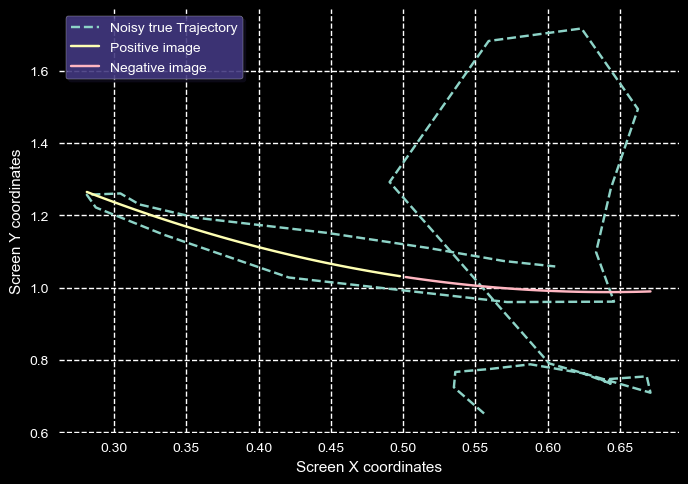

In [17]:
files = glob.glob(f"data/innovaid_hackathon_anima/input_coords_{size}/*.csv")
for file in files[:5]:
    df = pd.read_csv(file)
    if df.shape[0] != 50 * size:
        continue
    df.fillna(0, inplace=True)
    degree = 2

    for idx in set(df["SCENE_INDEX"]):
        x_coord = df[df["SCENE_INDEX"] == idx]["RX_coord_mean"]
        y_coord = df[df["SCENE_INDEX"] == idx]["RY_coord_mean"]

        coefficients = np.polyfit(x_coord, y_coord, 2)

        x_fit = np.linspace(min(x_coord), max(x_coord), 100)
        y_fit = np.polyval(coefficients, x_fit)


        middle_x = 0.5

        # Split the canvas and the curve
        x_left, x_right = x_fit[x_fit <= middle_x], x_fit[x_fit > middle_x]
        y_left, y_right = y_fit[x_fit <= middle_x], y_fit[x_fit > middle_x]


        try:
            dx_dt = np.gradient(x_left)
            dy_dt = np.gradient(y_left)
            arc_length = np.trapz(np.sqrt(dx_dt**2 + dy_dt**2))
        except ValueError:
            arc_length = 0
        print("left:", arc_length)

        try:
            dx_dt = np.gradient(x_right)
            dy_dt = np.gradient(y_right)
            arc_length = np.trapz(np.sqrt(dx_dt**2 + dy_dt**2))
        except ValueError:
            arc_length = 0
        print("right:", arc_length)

        # Plotting the original trajectory
        plt.plot(x_coord, y_coord, label='Noisy true Trajectory', ls="--")

        # Plotting the fitted curve
        # plt.plot(x_fit, y_fit, label=f'Fitted Curve (Degree {2})')
        plt.plot(x_left, y_left, label=f'Positive image')
        plt.plot(x_right, y_right, label=f'Negative image', c="lightpink")

        plt.xlabel("Screen X coordinates")
        plt.ylabel("Screen Y coordinates")

        # plt.xlim(0, 1)
        # plt.ylim(0, 1)

        plt.legend()

        # plt.plot(x_coord, y_coord, alpha=0.5)
        plt.show()
        # break
    break

In [345]:
curves_df = {}

files = glob.glob(f"data/innovaid_hackathon_anima/input_coords_{size}/*.csv")
for file in files:
    df = pd.read_csv(file)
    if df.shape[0] != 50 * size:
        continue

    df.fillna(0, inplace=True)
    degree = 2

    # curves_len = {str(idx): (0, 0) for idx in set(df["SCENE_INDEX"])}
    flat_values = []

    for idx in set(df["SCENE_INDEX"]):
        x_coord = df[df["SCENE_INDEX"] == idx]["RX_coord_mean"]
        y_coord = df[df["SCENE_INDEX"] == idx]["RY_coord_mean"]

        coefficients = np.polyfit(x_coord, y_coord, 2)

        x_fit = np.linspace(min(x_coord), max(x_coord), 100)
        y_fit = np.polyval(coefficients, x_fit)


        middle_x = 0.5

        # Split the canvas and the curve
        x_left, x_right = x_fit[x_fit <= middle_x], x_fit[x_fit > middle_x]
        y_left, y_right = y_fit[x_fit <= middle_x], y_fit[x_fit > middle_x]


        try:
            dx_dt = np.gradient(x_left)
            dy_dt = np.gradient(y_left)
            arc_length_left = np.trapz(np.sqrt(dx_dt**2 + dy_dt**2))
        except ValueError:
            arc_length_left = 0
        # print("left:", arc_length_left)

        try:
            dx_dt = np.gradient(x_right)
            dy_dt = np.gradient(y_right)
            arc_length_right = np.trapz(np.sqrt(dx_dt**2 + dy_dt**2))
        except ValueError:
            arc_length_right = 0
        # print("right:", arc_length_right)

        # curves_len[str(idx)] = (arc_length_left, arc_length_right)

        flat_values.append(arc_length_left)
        flat_values.append(arc_length_right)

    curves_df[file.split("/")[-1].split(".")[0]] = flat_values


/var/folders/br/pkbj6n1x4631dn3pbjc2plgc0000gn/T/ipykernel_63517/1355861297.py:19: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(x_coord, y_coord, 2)
/var/folders/br/pkbj6n1x4631dn3pbjc2plgc0000gn/T/ipykernel_63517/1355861297.py:19: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(x_coord, y_coord, 2)
/var/folders/br/pkbj6n1x4631dn3pbjc2plgc0000gn/T/ipykernel_63517/1355861297.py:19: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(x_coord, y_coord, 2)
/var/folders/br/pkbj6n1x4631dn3pbjc2plgc0000gn/T/ipykernel_63517/1355861297.py:19: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(x_coord, y_coord, 2)
/var/folders/br/pkbj6n1x4631dn3pbjc2plgc0000gn/T/ipykernel_63517/1355861297.py:19: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(x_coord, y_coord, 2)
/var/folders/br/pkbj6n1x4631dn3pbjc2plgc0000gn/T/ipykernel_63517/1355861297.py:19: RankWarning: Polyfit m

In [349]:
curves_df = pd.DataFrame.from_dict(curves_df).transpose()
curves_df

0         1         2         3         4   \
NIWf76Hey8eftwtH7Mhn   1.540867  0.000000  0.318907  0.075498  0.069570   
5wkYPhQUJDJ5wj1V2Nk4   1.056666  0.334286  0.585656  0.376500  0.472933   
krJ3q9NcKQ2elEdfUc2b   0.072591  0.710794  0.000000  0.883433  0.388821   
ykb8Kau47lOpf94ogXqW   1.097133  0.000000  0.133878  0.000000  0.139401   
9kaeHX0tKCwDx3YTqtKa   1.465403  0.000000  0.707747  0.000000  0.555981   
...                         ...       ...       ...       ...       ...   
VRBJWnNH1FLw3SosKEvd   0.181167  0.448170  0.760690  0.417324  0.605636   
Pf4Ae6IOVapo0dh6lNZX   0.416390  0.358176  0.525183  0.275791  0.708325   
X3jVp2rej5Xf40Ox3xRH   1.027391  0.548763  0.817272  0.435088  0.722227   
YFT4vvlSEy6uF6NrJgdy   0.337427  0.551360  0.237656  0.291192  0.302388   
sX1f0IigLUCRZ7QZBF0h  14.525069  1.380257  2.098564  0.473300  6.086225   

                            5         6         7         8         9   ...  \
NIWf76Hey8eftwtH7Mhn  0.197919  1.903348  0.234749  0.424621  0.219382  ...   
5wkYPhQUJDJ5wj1V2Nk4  0.232242  0.623011  0.169833  0.640380  0.310964  ...   
krJ3q9NcKQ2elEdfUc2b  0.261880  1.633393  0.000000  0.642680  0.000000  ...   
ykb8Kau47lOpf94ogXqW  0.000000  0.251370  0.000000  0.199133  0.000000  ...   
9kaeHX0tKCwDx3YTqtKa  0.000000  1.090938  0.000000  0.428443  0.243675  ...   
...                        ...       ...       ...       ...       ...  ...   
VRBJWnNH1FLw3SosKEvd  0.659394  0.404349  0.384214  0.439129  0.381709  ...   
Pf4Ae6IOVapo0dh6lNZX  0.329971  0.389819  0.256839  0.518651  0.452823  ...   
X3jVp2rej5Xf40Ox3xRH  0.506017  1.136694  0.483368  0.700662  0.311697  ...   
YFT4vvlSEy6uF6NrJgdy  0.304730  0.230862  0.389391  0.241498  0.473214  ...   
sX1f0IigLUCRZ7QZBF0h  1.353294  1.194056  1.024070  0.918973  0.771609  ...   

                            90        91        92        93        94  \
NIWf76Hey8eftwtH7Mhn  0.502309  0.347747  0.131862  0.207535  0.183522   
5wkYPhQUJDJ5wj1V2Nk4  0.590304  0.000000  0.578554  0.000000  0.603981   
krJ3q9NcKQ2elEdfUc2b  0.492920  0.078373  0.562164  0.217411  0.701419   
ykb8Kau47lOpf94ogXqW  0.251358  0.000000  0.197902  0.000000  0.290790   
9kaeHX0tKCwDx3YTqtKa  0.632043  1.867441  0.437432  0.444704  0.382157   
...                        ...       ...       ...       ...       ...   
VRBJWnNH1FLw3SosKEvd  0.401729  0.662510  0.573460  0.734549  1.601591   
Pf4Ae6IOVapo0dh6lNZX  0.492919  0.309518  0.850850  0.397515  0.438945   
X3jVp2rej5Xf40Ox3xRH  0.454141  0.229255  0.900399  0.345705  2.074091   
YFT4vvlSEy6uF6NrJgdy  0.316879  0.454634  0.243853  0.316942  0.201456   
sX1f0IigLUCRZ7QZBF0h  2.200004  0.167931  2.035485  0.447091  1.831408   

                            95        96        97        98        99  
NIWf76Hey8eftwtH7Mhn  0.206184  0.733636  0.321918  0.320498  0.177371  
5wkYPhQUJDJ5wj1V2Nk4  0.000000  0.722968  0.000000  0.762436  0.000000  
krJ3q9NcKQ2elEdfUc2b  0.000000  0.000000  0.772407  0.128681  0.560090  
ykb8Kau47lOpf94ogXqW  0.000000  0.069217  0.000000  0.226212  0.000000  
9kaeHX0tKCwDx3YTqtKa  1.237564  0.575397  0.409581  1.263904  1.674341  
...                        ...       ...       ...       ...       ...  
VRBJWnNH1FLw3SosKEvd  0.572547  0.349032  1.003985  0.321342  0.839397  
Pf4Ae6IOVapo0dh6lNZX  0.328358  0.598898  0.221545  0.721984  0.330707  
X3jVp2rej5Xf40Ox3xRH  0.407387  0.955118  0.350410  0.448184  0.216995  
YFT4vvlSEy6uF6NrJgdy  0.493689  0.335392  0.481461  0.197401  0.381538  
sX1f0IigLUCRZ7QZBF0h  0.253393  2.160569  0.357414  1.733311  0.256841  

[2963 rows x 100 columns]

In [350]:
curves_df.to_csv("data/innovaid_hackathon_anima/input_curves_len.csv")